# Final Project - Adidas Sales DataSet Analysis

## Importing the dataset xslx from the google drive and loading it into Local machine  MongoDB

In [30]:
# Importing necessary libraries
import pandas as pd                  # Import the pandas library for data manipulation
from pymongo import MongoClient     # Import the MongoClient class from pymongo for MongoDB interaction
import gdown                        # Import gdown library for downloading files from Google Drive
import pandas as pd                 # Import the pandas library for data manipulation and analysis
import matplotlib.pyplot as plt     # Import the matplotlib.pyplot submodule from the matplotlib library for data visualization
import seaborn as sns               # Import the seaborn library, which is built on top of matplotlib, for creating informative and attractive statistical graphics


# Defining MongoDB connection details and data sources
mongo_uri = "mongodb://localhost:27017/"    # URI to connect to the local MongoDB server
database_name = "Adidas_Dataset"             # Name of the MongoDB database
collection_name = "Sales_Dataset"            # Name of the collection within the database


In [31]:

# Defining the Google Drive file ID and construct the download URL
file_id = "1gL3HgBgG8DOaaGDnDZeAQJdTHoCcPREB"          # ID of the Excel file on Google Drive
gdrive_url = f"https://drive.google.com/uc?id={file_id}"  # Construct the download URL using the file ID

# Downloading the Excel data from the Google Drive URL and load it into a Pandas DataFrame
data = pd.read_excel(gdrive_url)    # Use pandas to read the Excel data from the URL and store it in 'data'

# Connect ingto MongoDB and select the database and collection
client = MongoClient(mongo_uri)    # Create a MongoDB client object connected to the specified URI
db = client[database_name]         # Select the specified database within the client
collection = db[collection_name]   # Select the specified collection within the database


In [32]:
data_dict = data.to_dict("records")  
# Converting the Pandas DataFrame 'data' into a list of dictionaries, 
# where each dictionary represents a record (row) in the DataFrame

In [33]:
collection.insert_many(data_dict)  
# Inserting the list of dictionaries 'data_dict' into the MongoDB collection,
# where each dictionary corresponds to a record (document) in the collection

In [34]:
client.close()  
# Closing the connection to the MongoDB client, releasing the resources
# and ensuring that the connection is properly closed after data insertion.

In [35]:
print("Data inserted into MongoDB successfully.")  
# Display a message to indicate that the data insertion into MongoDB was completed successfully

Data inserted into MongoDB successfully.


In [36]:
# Defining MongoDB connection details and data sources
mongo_uri = "mongodb://localhost:27017/"    # URI to connect to the local MongoDB server
database_name = "Adidas_Dataset"             # Name of the MongoDB database
collection_name = "Sales_Dataset"            # Name of the collection within the database

In [37]:
client = MongoClient(mongo_uri)
# Creating a MongoDB client object connected to the specified URI

db = client[database_name]
# Selecting the specified database within the MongoDB client

collection = db[collection_name]
# Select the specified collection within the selected database

data = pd.DataFrame(list(collection.find()))
# Using the 'find()' method to retrieve all documents (records) from the collection,
# converting the retrieved documents into a list of dictionaries,
# and creating a Pandas DataFrame from the list of dictionaries


In [38]:
client.close()  
# Close the connection to the MongoDB client, releasing the resources
# and ensuring that the connection is properly closed after data insertion.

## Business Question 1: What are the top-selling states in the US and how do their sales vary across different states?

In [39]:
state_sales = data.groupby("State")["Total Sales"].sum().sort_values(ascending=False)
# Grouping the data in the DataFrame by the "State" column,
# calculating the sum of "Total Sales" for each state group,
# and then sorting the resulting sums in descending order

top_selling_states = state_sales.head(5)
# Selecting the top 5 states with the highest total sales from the grouped and sorted data


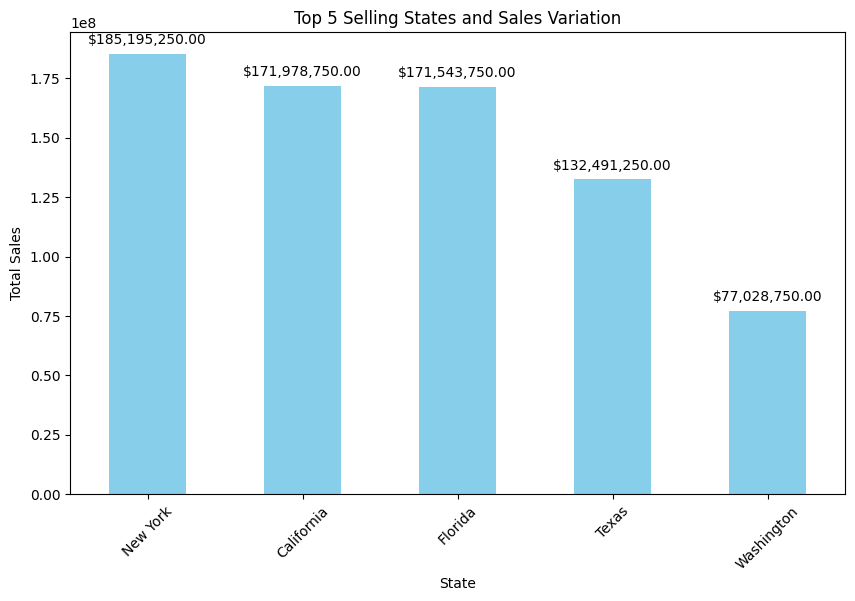

In [40]:
plt.figure(figsize=(10, 6))
# Creating a new figure with a specified width and height (in inches) for the plot

ax = top_selling_states.plot(kind="bar", color="skyblue")
# Creating a bar plot using the 'top_selling_states' data
# Seting the bars' color to "skyblue"

# Displaying total sales values on top of each bar
for p in ax.patches:
    ax.annotate(f"${p.get_height():,.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')
# Annotating each bar with the corresponding total sales value,
# positioning the annotation at the center of the bar
# Adjusting the font size, color, and text position for the annotation

plt.title("Top 5 Selling States and Sales Variation")
# Setting the plot title

plt.xlabel("State")
# Setting the label for the x-axis

plt.ylabel("Total Sales")
# Settng the label for the y-axis

plt.xticks(rotation=45)
# Rotating the x-axis labels by 45 degrees for better readability

plt.show()
# Displaying the plot


## Business Question 2: Which customer segment generates the highest sales and profits, and how does it differ across different states or cities?

In [41]:
segment_data = data.groupby("Sales Method")[["Total Sales", "Operating Profit"]].sum()
# Grouping the data in the DataFrame by the "Sales Method" column
# Calculating the sum of "Total Sales" and "Operating Profit" for each sales method group
# Creating a new DataFrame 'segment_data' with the calculated sums for each sales method


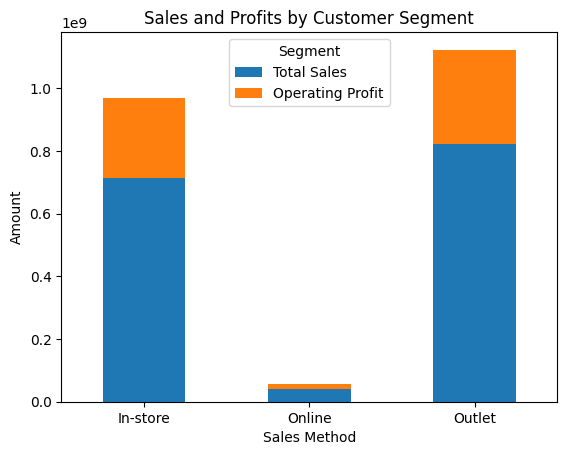

In [42]:
segment_data.plot(kind="bar", stacked=True)
# Creating a stacked bar plot using the data in the 'segment_data' DataFrame

plt.title("Sales and Profits by Customer Segment")
# Setting the title of the plot

plt.xlabel("Sales Method")
# Setting the label for the x-axis

plt.ylabel("Amount")
# Setting the label for the y-axis

plt.xticks(rotation=0)
# Do not rotate the x-axis labels (keep them horizontal)

plt.legend(title="Segment")
# Adding a legend to the plot with the title "Segment"

plt.show()
# Displaying the plot


## Business Question 3: How do the sales and profits vary across different product categories?


In [43]:
category_data = data.groupby("Product")[["Total Sales", "Operating Profit"]].sum()
# Grouping the data in the DataFrame by the "Product" column
# Calculating the sum of "Total Sales" and "Operating Profit" for each product group
# Creating a new DataFrame 'category_data' with the calculated sums for each product


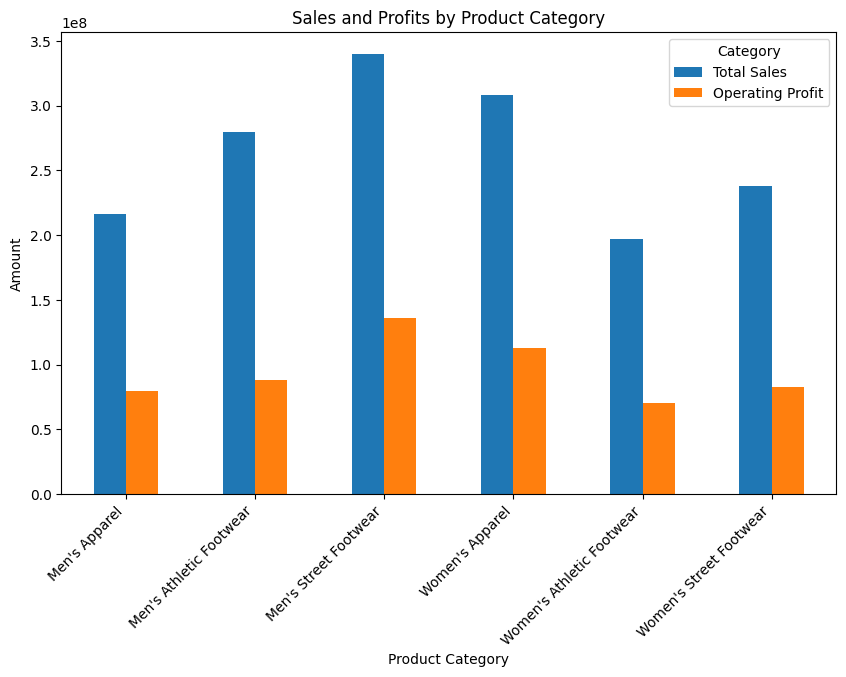

In [44]:
category_data.plot(kind="bar", figsize=(10, 6))
# Creating a bar plot using the data in the 'category_data' DataFrame
# Seting the figure size to (10, 6)

plt.title("Sales and Profits by Product Category")
# Setting the title of the plot

plt.xlabel("Product Category")
# Set the label for the x-axis

plt.ylabel("Amount")
# Setting the label for the y-axis

plt.xticks(rotation=45, ha="right")
# Rotatingthe x-axis labels by 45 degrees and align them to the right for better readability

plt.legend(title="Category")
# Adding a legend to the plot with the title "Category"

plt.show()
# Displaying the plot


## Business Question 4: What is the distribution of sales methods across different product categories?

In [45]:
grouped_data = data.groupby(["Product", "Sales Method"]).size().reset_index(name="Count")
# Grouping the data in the DataFrame by both "Product" and "Sales Method" columns
# Calculating the size of each group (number of occurrences) and reset the index
# Creating a new DataFrame 'grouped_data' with columns "Product", "Sales Method", and "Count"

pivot_table = grouped_data.pivot(index="Product", columns="Sales Method", values="Count").fillna(0)
# Creating a pivot table from the 'grouped_data' DataFrame
# Setting "Product" as the index, "Sales Method" as the columns, and "Count" as the values
# Filling any missing values (NaNs) with 0 in the pivot table


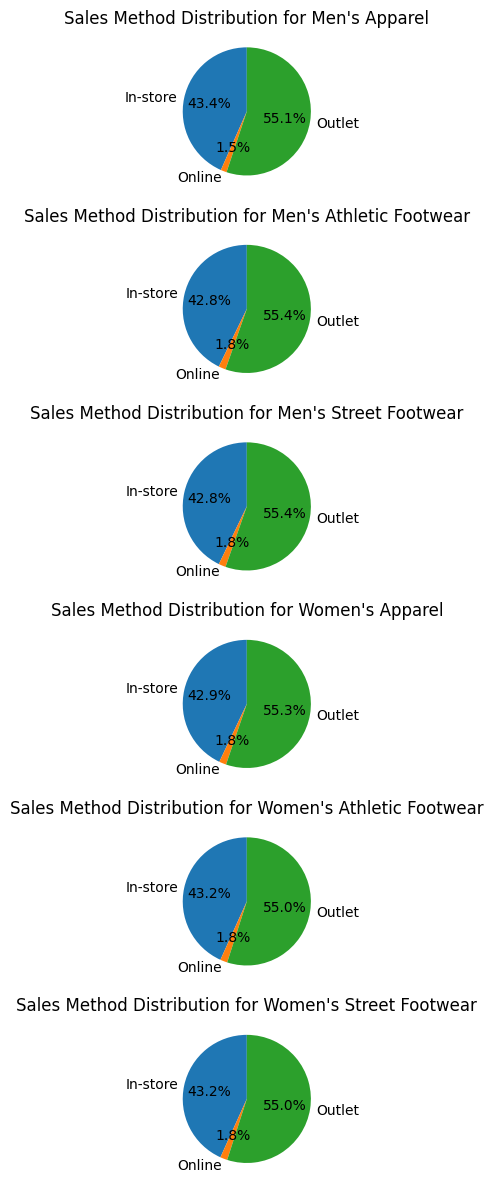

In [46]:
fig, axes = plt.subplots(nrows=len(pivot_table), ncols=1, figsize=(5, 2 * len(pivot_table)))
# Creating subplots with a number of rows equal to the number of rows in 'pivot_table'
# Each subplot has 1 column, and the figure size is determined by the specified formula

for idx, (product, row) in enumerate(pivot_table.iterrows()):
    ax = axes[idx]
    # Getting the current axis for the current row

    ax.pie(row, labels=row.index, autopct='%1.1f%%', startangle=90)
    # Creating a pie chart on the current axis
    # 'row' contains the data for the current product's sales method distribution
    # 'row.index' provides labels for the pie chart segments
    # 'autopct' formats the percentage labels, 'startangle' sets the starting angle of the chart

    ax.set_title(f"Sales Method Distribution for {product}")
    # Setting the title of the current subplot

plt.tight_layout()
# Adjusting the layout to prevent overlapping of subplots

plt.show()
# Displaying the plot
